In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def cal_prob (network_size, r):
    distance_list = [i for i in range(1, 2 * network_size)]
    logits = [distance ** (-r) for distance in distance_list]
    total_logits = sum(logits)
    probs = [logit/total_logits for logit in logits]
    return probs

In [32]:
def assign_available_node (node_x, node_y, probs, network_size):
    available_node = []

    # local node
    if node_x == 0:
        available_node.append((node_x + 1, node_y))
    elif node_x == (network_size-1):
        available_node.append((node_x - 1, node_y))
    else:
        available_node.append((node_x + 1, node_y))
        available_node.append((node_x - 1, node_y))
    
    if node_y == 0:
        available_node.append((node_x, node_y + 1))
    elif node_y == (network_size-1):
        available_node.append((node_x, node_y - 1))
    else:
        available_node.append((node_x, node_y + 1))
        available_node.append((node_x, node_y - 1))
    
    total_prob = 0
    sample_dis = 0
    sample_prob = random.random()
    for idx, prob in enumerate(probs):
        if sample_prob <= (prob + total_prob):
            sample_dis = idx
            break
        total_prob += prob
    direction = random.choice(['hor+', 'hor-', 'ver+', 'ver-'])
    if direction == 'hor+':
        available_node.append((min(network_size - 1, node_x + sample_dis), node_y))
    elif direction == 'hor-':
        available_node.append((max(0, node_x - sample_dis), node_y))
    elif direction == 'ver+':
        available_node.append((node_x, min(network_size - 1, node_y + sample_dis)))
    else:
        available_node.append((node_x, max(0, node_y - sample_dis)))
    # long distance node
    # horizontal
    # total_logits = []
    # coordinate = []
    # for x in range(network_size):
    #     if abs(x - node_x) <= 0:
    #         continue
    #     distance = abs(node_x - x)
    #     logits = distance ** (-r)
    #     total_logits.append(logits)
    #     coordinate.append((x, node_y))
    
    # for y in range(network_size):
    #     if abs(y - node_y) <= 0:
    #         continue
    #     distance = abs(node_y - y)
    #     logits = distance ** (-r)
    #     total_logits.append(logits)
    #     coordinate.append((node_x, y))
    
    # sum_logits = sum(total_logits)

    # probs = [logits/sum_logits for logits in total_logits]
    # total_prob = 0
    # # cummu_prob = []
    # sample_prob = random.random()
    # sample_idx = 0
    # for idx, prob in enumerate(probs):
    #     # cummu_prob.append(prob + total_prob)
    #     if sample_prob <= (prob + total_prob):
    #         sample_idx = idx
    #         break
    #     total_prob += prob
    # sample_coordinate = coordinate[sample_idx]
    # available_node.append(sample_coordinate)
    return available_node

In [33]:
def cal_distance(node_1, node_2):
    node_1_x = node_1[0]
    node_1_y = node_1[1]
    node_2_x = node_2[0]
    node_2_y = node_2[1]
    return abs(node_1_x - node_2_x) + abs(node_1_y - node_2_y)

In [34]:
def find_path(source_node, target_node, probs, network_size):
    trajectory = []
    visited = set()
    trajectory.append(source_node)
    visited.add(source_node)
    while source_node != target_node:
        available_node = assign_available_node(source_node[0], source_node[1], probs, network_size)
        min_distance = network_size * 2
        min_node = (0, 0)
        for node in available_node:
            if node in visited:
                continue
            dis = cal_distance(node, target_node)
            if dis < min_distance:
                min_distance = dis
                min_node = node
        source_node = min_node
        trajectory.append(source_node)
        visited.add(source_node)
    return trajectory

In [41]:
r_list = np.arange(0, 2, 0.05).tolist()
sample_num = 1000
network_size = 5000
path_length_list = {}
logT = []

for r in r_list:
    print(f"Now running r={r}")
    path_length_list[r] = []
    for _ in range(sample_num):
        source_x = random.randint(0, network_size - 1)
        source_y = random.randint(0, network_size - 1)
        target_x = random.randint(0, network_size - 1)
        target_y = random.randint(0, network_size - 1)
        source_node = (source_x, source_y)
        target_node = (target_x, target_y)
        probs = cal_prob(network_size, r)
        trajectory = find_path(source_node, target_node, probs, network_size)
        length = len(trajectory) - 1
        path_length_list[r].append(length)
    logT.append(np.mean(path_length_list[r]))
    print(f"Average Path Length: {np.mean(path_length_list[r])}")

Now running r=0.0
Average Path Length: 251.979
Now running r=0.05
Average Path Length: 239.223
Now running r=0.1
Average Path Length: 224.32
Now running r=0.15000000000000002
Average Path Length: 210.549
Now running r=0.2
Average Path Length: 192.317
Now running r=0.25
Average Path Length: 181.713
Now running r=0.30000000000000004
Average Path Length: 174.408
Now running r=0.35000000000000003
Average Path Length: 159.805
Now running r=0.4
Average Path Length: 149.407
Now running r=0.45
Average Path Length: 140.596
Now running r=0.5
Average Path Length: 129.746
Now running r=0.55
Average Path Length: 124.05
Now running r=0.6000000000000001
Average Path Length: 115.931
Now running r=0.65
Average Path Length: 112.218
Now running r=0.7000000000000001
Average Path Length: 107.071
Now running r=0.75
Average Path Length: 101.419
Now running r=0.8
Average Path Length: 96.187
Now running r=0.8500000000000001
Average Path Length: 97.908
Now running r=0.9
Average Path Length: 95.908
Now running r

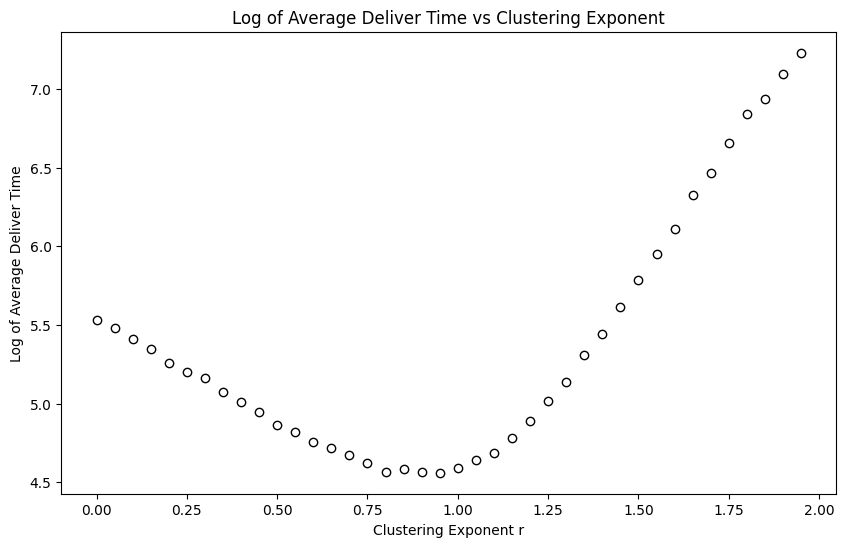

In [44]:
import matplotlib.pyplot as plt

# Plotting the data with hollow black points and no line
plt.figure(figsize=(10, 6))
plt.plot(r_list, np.log(logT), 'o', markerfacecolor='none', markeredgecolor='black')
plt.title('Log of Average Deliver Time vs Clustering Exponent')
plt.xlabel('Clustering Exponent r')
plt.ylabel('Log of Average Deliver Time')
# plt.grid(True)
plt.show()